<a href="https://colab.research.google.com/github/VGuerrero07/Data_Science/blob/master/Analyzing_Airbnb_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://a0.muscache.com/airbnb/static/logos/belo-200x200-4d851c5b28f61931bf1df28dd15e60ef.png">

# Analyzing Airbnb Data - Stockholm, Sweden

We can say that [Airbnb](https://www.airbnb.com.br/) is the most famous hotel company in the world. Fun fact: **it doesn't even own a hotel**, or any real estate listing!

By providing a platform in which hosts can offer their houses for short-term lodging and tourism-related activities, the company has transformed the whole hospitality industry, and 10 years after its foundation has already **hosted more than 300 million people**.

One of the company's initiatives is to make data from many cities around the world available for users. Through the portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), it is possible to download a lot of data for *Data Science* projects.

**In this *notebook*, we are going through Airbnb Stockholm, Sweden, and we are going to see what we can conclude and what insights we can have, using the available data.**

## About the City
<img alt="Colaboratory logo" width="40%"  src="https://www.pymnts.com/wp-content/uploads/2020/04/Sweden-COVID-19-coronavirus-social-distancing.jpg">

Stockholm is the capital City and the most populous urban area of Sweden and Scandinavia. 975,904 people live in the municipality, approximately 1.6 million in the urban area, and 2.4 million in the metropolitan area.

Because of its natural beauties, museums, and parks, Stockholm County is ranked as the 10th largest visitor destination in Europe, with over 10 million commercial overnight stays per year. Among 44 European cities, Stockholm had the 6th highest growth in the number of nights spent in the period 2004–2008, making it one of the preferred destinations for tourists going to Europe.

Therefore, it is one of the preferred destinations for tourists going to Europe!

## Getting Data

All data used here was obtained via [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

For this initial exploratory analysis, the following file will be downloaded:

* `listings.csv` - *Summary information and metrics for listings in Stockholm (good for visualisations).*

In [0]:
# importing relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# import file listings.csv to a DataFrame

df = pd.read_csv("http://data.insideairbnb.com/sweden/stockholms-l%C3%A4n/stockholm/2020-04-28/visualisations/listings.csv")

In [4]:
df['price'].describe()

count     7432.000000
mean      1099.057858
std        995.340804
min         90.000000
25%        611.000000
50%        902.000000
75%       1303.000000
max      25003.000000
Name: price, dtype: float64

## Analyzing Data

This step has the goal to create a situational analysis of the data obtained, enabling us to understand how they are structured.


**DATA DICTIONARY**
<br>

* `id` - id number generated for the house;
* `name` - Name of the property offered for customers;
* `host_id` - host ID number;
* `host_name` - Host's name;
* `neighbourhood_group` - this column does not have any value;
* `neighbourhood` - name of the neighbourhood;
* `latitude` - latitude coordinate of the property;
* `longitude` - longitude coordinate of the property;
* `room_type` - inform what type is the room offered;
* `price` - renting price;
* `minimum_nights` - minimum nights required to book the room;
* `number_of_reviews` - number of reviews the property has;
* `last_review` - last review date;
* `reviews_per_month` - number of reviews per month;
* `calculated_host_listings_count` - number of properties offered by the same host;
* `availability_365` - number of days available within 365 days.

Before we start to analyze the dataset, let's check how the first rows look like!

In [0]:
#checking the first 5 rows of the dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,155220,"Stockholm, new spacoius villa",746396,Madeleine,NaN,Skarpnäcks,59.24667,18.17799,Entire home/apt,1203,3,0,NaN,NaN,2,0
1,155685,Hornstull with water view!,748592,Robert,NaN,Södermalms,59.31535,18.03277,Entire home/apt,3257,4,22,2015-12-01,0.21,1,0
2,164448,Double room in central Stockholm with Wi-Fi,784312,Li,NaN,Södermalms,59.31268,18.06258,Private room,601,3,322,2020-01-29,3.02,2,169
3,170651,Petit Charm Rooftop next to heaven,814021,Marie,NaN,Södermalms,59.31568,18.03138,Entire home/apt,752,4,34,2020-03-09,0.32,1,255
4,206221,Doubleroom at Södermalm &trendySofo,1022374,Elisabeth,NaN,Södermalms,59.31226,18.07942,Shared room,671,3,79,2019-12-08,0.77,1,239


### Q1: How many attributes (variables) and how many inputs does our dataset have? What are the types of the variables?

First of all, we are going to identify how many inputs the dataset has and check the types of each column.

The dataset that we are using is the summarized version of another one available in Airbnb: on the same page that we have downloaded it, there is a more complete version, named `listings.csv.gz`.

In [0]:
# identify the volume of data contained in the Dataframe
print("Inputs: {}".format(df.shape[0]))
print("Variables: {}\n".format(df.shape[1]))

# Verify first 5 inputs of the Dataframe
display(df.dtypes)

Inputs: 7432
Variables: 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. What is the percentage of missing values in the dataset?**

The quality of a dataset is directly related to the amount of missing values in it. It is important to understand right at the beginning if these missing values are relevant, comparing them with the number of rows the dataset has.

* It is possible to see that `neighbourhood_group` has only null values.
* The columns `reviews_per_month` e `last_review` have null values in 20% of the rows, approximately.
* The column `name` has 0.3% of null values.

In [0]:
# Descending order of variables, by missing values
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.210710
last_review                       0.210710
name                              0.003364
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. How is the distribution of the variables?** 

To answer this question, I will plot some histograms.

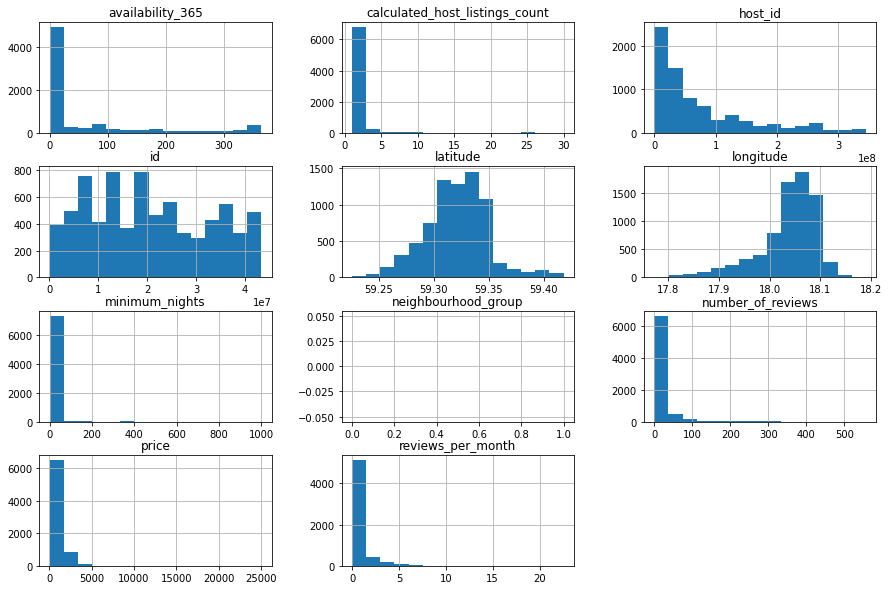

In [0]:
# Plot histogram of numerical variables
df.hist(bins=15, figsize=(15,10));

### **Q4. Are there outliers?** 

An outlier is defined as a data point that differs significantly from other observations. Since these values can distort our analysis and graphical visualizations, it is really important to identify them before analyzing any dataset.

There is evidence of the presence of outliers in our dataset. For example. take a look at these three variables.

Therefore, here are two quick ways that we can use to detect outliers in our dataset:  

* Statistical description using the method `describe()`
* Plot `boxplots` for the variables.


In [0]:
# see descriptive statistics of the variables
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7432.000000,7432.000000,7432.000000,5866.000000,7432.000000,7432.000000
mean,1099.057858,5.650161,15.991927,0.730066,1.851453,61.320640
std,995.340804,23.260776,36.454988,1.171884,3.479181,107.167649
min,90.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,611.000000,2.000000,1.000000,0.120000,1.000000,0.000000
50%,902.000000,3.000000,5.000000,0.320000,1.000000,0.000000
75%,1303.000000,4.000000,15.000000,0.780000,1.000000,87.000000
max,25003.000000,1000.000000,557.000000,22.550000,30.000000,365.000000


Analyzing the shown above, we can confirm some hypothesis, such as:


*   The variable `price` has 75% of its values below 1303, but has a maximum value of almost 25000.
*   The maximum value of `minimum_nights` is 1000, way more than 365 days in a year.

#### Boxplot of minimum nights


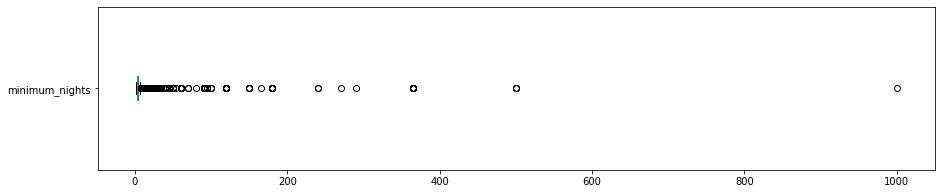

minimum_nights: values above 30:
114 items
1.5339%


In [0]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# see amount of minimum_nights values above 30
print("minimum_nights values above 30:")
print("{} items".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot for Price

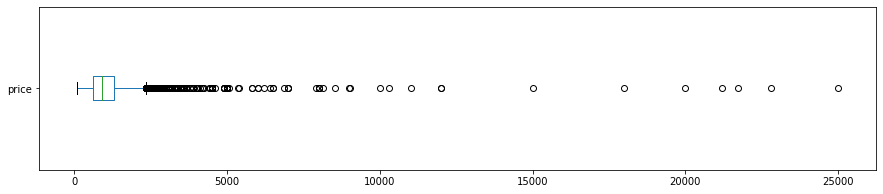


Price values above 2400:
298 items
4.0097%



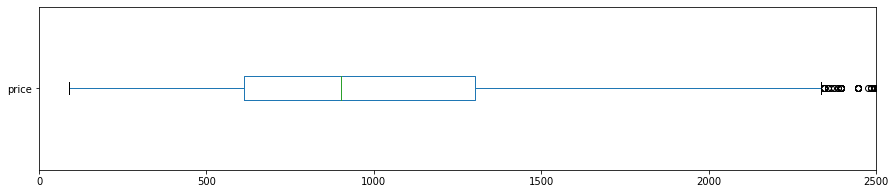

In [0]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# Price values above 1500
print("\nPrice values above 2400:")
print("{} items".format(len(df[df.price > 2500])))
print("{:.4f}%\n".format((len(df[df.price > 2500]) / df.shape[0])*100))

# Check Boxplot in other dimension 
df.price.plot(kind='box', vert=False, xlim=(0,2500), figsize=(15,3));

#### Histogram without outliers

Since we found outliers in the variables `price` and `minimum-nights`, we are going to clean our DataFrame and plot the histogram again.

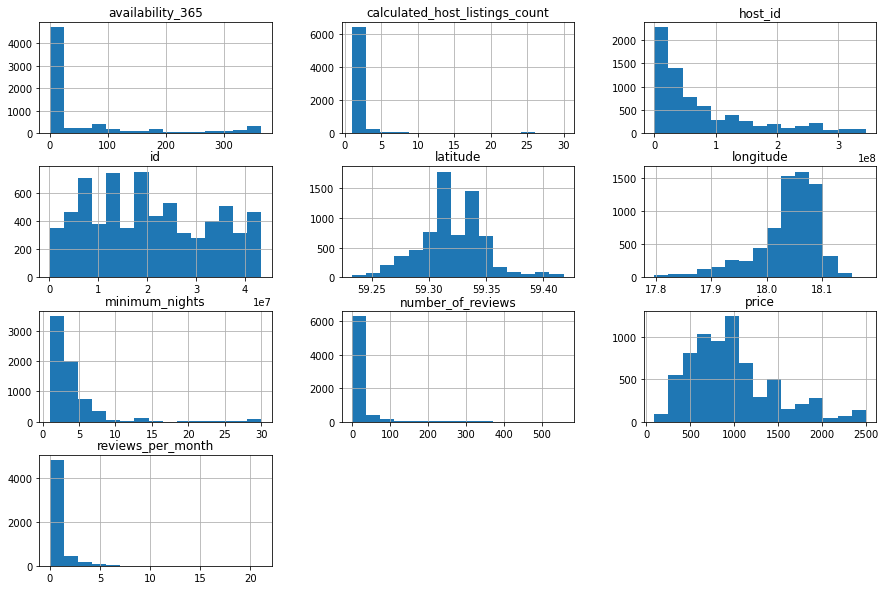

In [0]:
# Removing outliers to a new dataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 2500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remove `neighbourhood_group`, because it has no values
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plot new histograms for numerical variables
df_clean.hist(bins=15, figsize=(15,10));

### **Q5 - What is the average price?**

In [0]:
# Check average price

print("The average price, with outliers, is {:.2f}\n".format(df['price'].mean()))
print("The average price, no outliers, is {:.2f}\n".format(df_clean['price'].mean()))

The average price, with outliers, is 1099.06

The average price, no outliers, is 975.01



### **Q6 - What is the correlation between variables?**

Correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. In the context of our analysis, we want to verify the correlation or similarity between two variables.

This relationship can be measured, and the goal of the correlation coefficient is to represetnt its itensity. To idetify current correlations between our variables, we can use:

* Correlation Matrix
* Heatmap, using library `seaborn`

In [0]:
# Creating correlation matrix
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.024245,-0.067256,-0.083870,0.033213,0.021143
minimum_nights,0.024245,1.000000,-0.091361,-0.142274,-0.026182,0.025818
number_of_reviews,-0.067256,-0.091361,1.000000,0.714905,0.055369,0.240512
reviews_per_month,-0.083870,-0.142274,0.714905,1.000000,0.286795,0.310372
calculated_host_listings_count,0.033213,-0.026182,0.055369,0.286795,1.000000,0.256659
availability_365,0.021143,0.025818,0.240512,0.310372,0.256659,1.000000


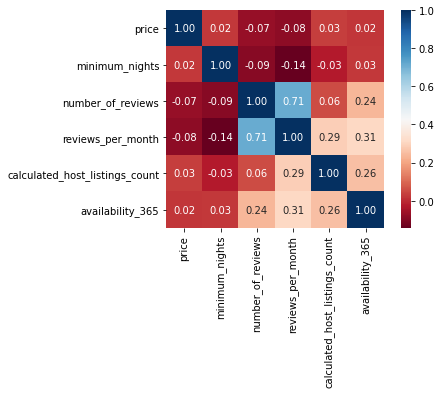

In [0]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. What is the preferred room type in Airbnb Stockholm?**

The column `room_type` shows the type of location offerred. If you have ever booked a room using the platform, you know that there are many options to choose from: entire houses/apartments, just a private room or a shared room.

Let's count the number of occurrences of each type, using the method `value_counts()`.

In [0]:
# show number of occurences
print("Number of ocurrences of each room:\n")
print(df_clean.room_type.value_counts())

# show number of ocurrences in percentage.
print("\nNumber of relative ocurrences of each room:\n")
print(df_clean.room_type.value_counts() / df_clean.shape[0])

Number of ocurrences of each room:

Entire home/apt    5726
Private room       1190
Hotel room           54
Shared room          53
Name: room_type, dtype: int64

Number of relative ocurrences of each room:



Entire home/apt    0.815321
Private room       0.169443
Hotel room         0.007689
Shared room        0.007547
Name: room_type, dtype: float64

### **Q8. What are the most expensive locations in Stockholm?**

One good way to analyze one variable in function of another is using the function `groupby().`

In our case, we want to see the value of price according to the informed neighborhoods.

In [0]:
print(df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10])

print("\n")

# Check the number of items in Normmalms, Södermalms and Östermalms:

print(df_clean[df_clean.neighbourhood == "Norrmalms"].shape)
print(df_clean[df_clean.neighbourhood == "Södermalms"].shape)
print(df_clean[df_clean.neighbourhood == "Östermalms"].shape)

neighbourhood
Norrmalms                 1131.746286
Södermalms                1097.744540
Östermalms                1056.214511
Kungsholmens               958.089157
Bromma                     919.941176
Älvsjö                     911.961783
Skarpnäcks                 859.501538
Enskede-Årsta-Vantörs      854.709156
Hägersten-Liljeholmens     826.890263
Farsta                     809.695431
Name: price, dtype: float64


(875, 15)
(1969, 15)
(634, 15)


We can see that the cheapest neighborhoods, out of these 10, is Farsta. This makes me nostalgia, since this was the neighborhoods in which I lived for almost 7 months. It is a really calm place, where you have some parks, a beautiful lake, and a shopping place at Farsta centrum, but it is not known as a famous tourist attractions

We also see that Norrmalms is the most expensive neighborhoods. This district is where the city center takes place (according to [Visit Stockholm](https://www.visitstockholm.com/guides/citynorrmalm/)). There, you can find many souvenir shops and shopping malls, in Drottninggatan, the Central Station (T-Centralen), the Royal Opera house, and many other tourist attractions.


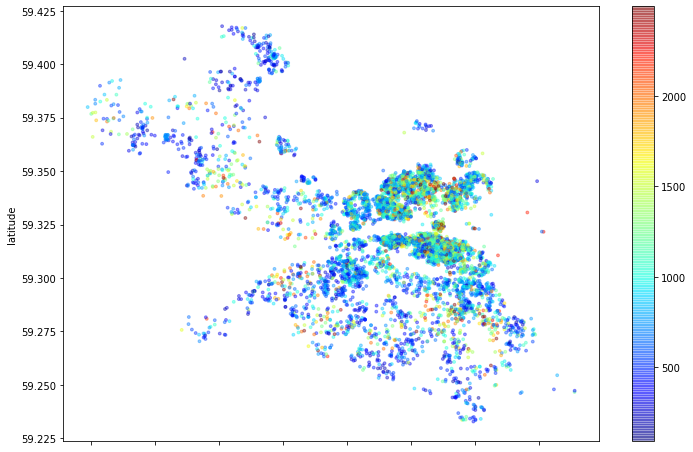

In [0]:
# plotting the places to stay according to location
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusions

It is important to say that this is a dataset ideal for an initial analysis. For a deeper analysis, using the most complete dataset available is recommended.

However, even with this simple analysis, we were able to identify outliers, prices in different neighborhoods, and a statistical description of some variables.